In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

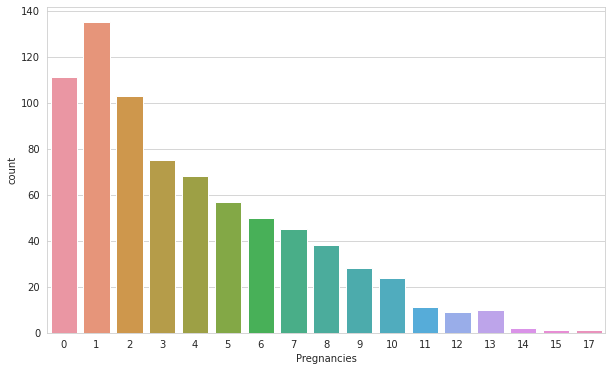

In [8]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(x='Pregnancies',data=df)

<AxesSubplot:>

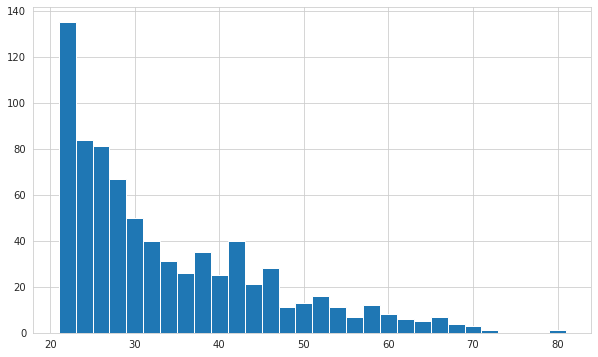

In [14]:
plt.figure(figsize=(10,6))
df['Age'].hist(bins=30)

<AxesSubplot:xlabel='Glucose', ylabel='BloodPressure'>

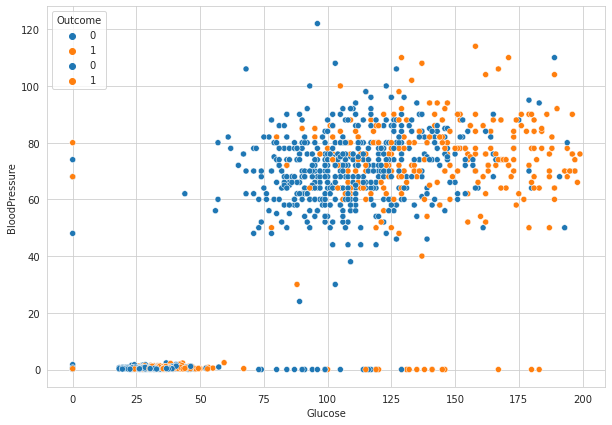

In [25]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Glucose',y='BloodPressure',data=df,hue='Outcome')


<AxesSubplot:xlabel='BMI', ylabel='DiabetesPedigreeFunction'>

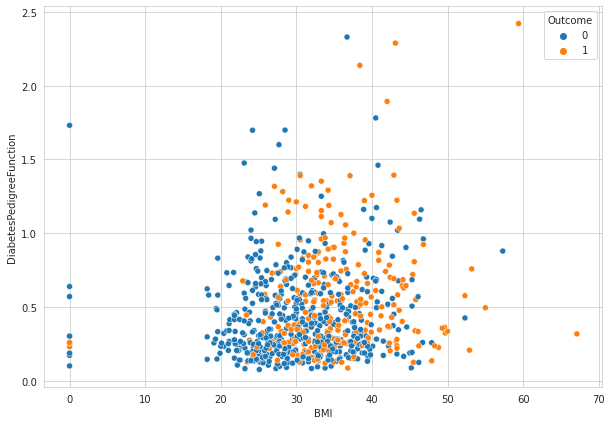

In [27]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='BMI',y='DiabetesPedigreeFunction',data=df,hue='Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

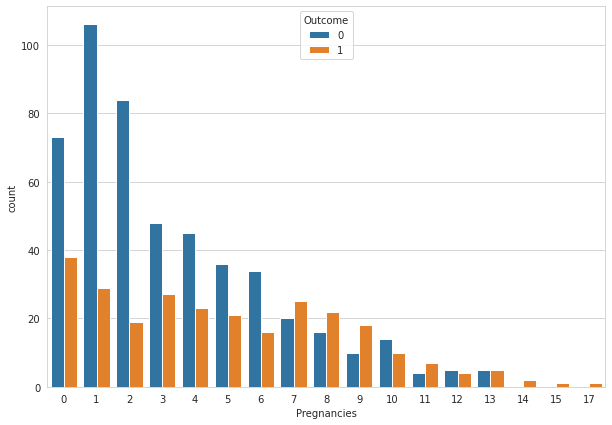

In [29]:
plt.figure(figsize=(10,7))
sns.countplot(x='Pregnancies',data=df,hue='Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='Age'>

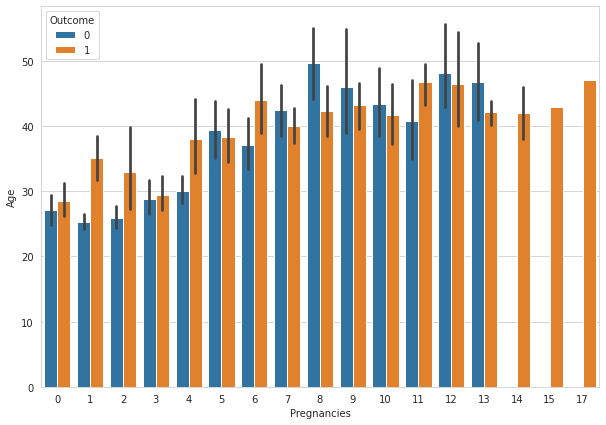

In [56]:
plt.figure(figsize=(10,7))
sns.barplot(x='Pregnancies',y='Age',data=df,hue='Outcome')

<AxesSubplot:>

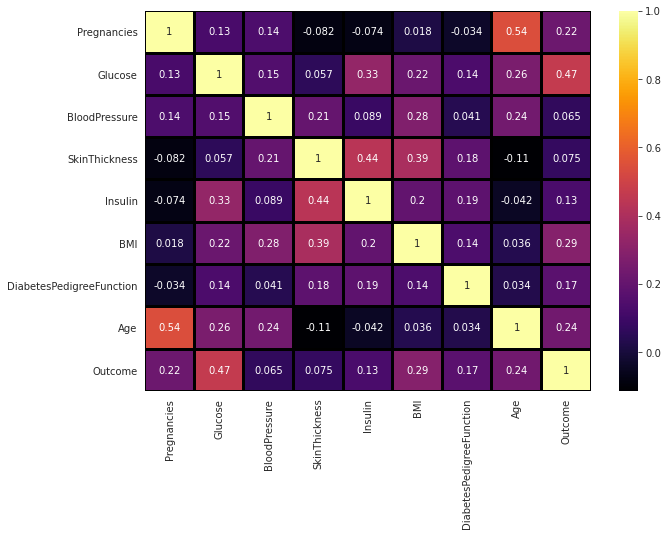

In [52]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),cmap='inferno',linecolor='black',linewidths=2,annot=True)

In [30]:
X=df.drop(columns='Outcome',axis=1)
y=df['Outcome']

In [31]:
X.shape

(768, 8)

In [33]:
y.shape

(768,)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [36]:
X_train.shape,X_test.shape

((614, 8), (154, 8))

In [37]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

/home/dell/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
pred=model.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [41]:
print(accuracy_score(y_test,pred))

0.8246753246753247


In [42]:
print(confusion_matrix(y_test,pred))

[[98  9]
 [18 29]]


In [43]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



In [49]:
input_data=(5,121,72,23,112,26.2,0.245,30)
data=np.asarray(input_data)
final_data=data.reshape(1,-1)

In [50]:
prediction=model.predict(final_data)
print(prediction)

[0]
